In [22]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pt 
import math 
import scipy
from statsmodels import robust

%matplotlib inline

# Load Data 

In [23]:
""" Attempt to estimate depth of exoplanet obtained by mock HST data

    Author: Anastasios Tzanidakis

""""


#Load data:
data=np.loadtxt(".../data_headers.dat")

#Define data:
t=(data[:,0])- np.median(data[:,0])
flux=data[:,1] #-e/s
error_flux=data[:,2] #-e/s

# Plot Data 

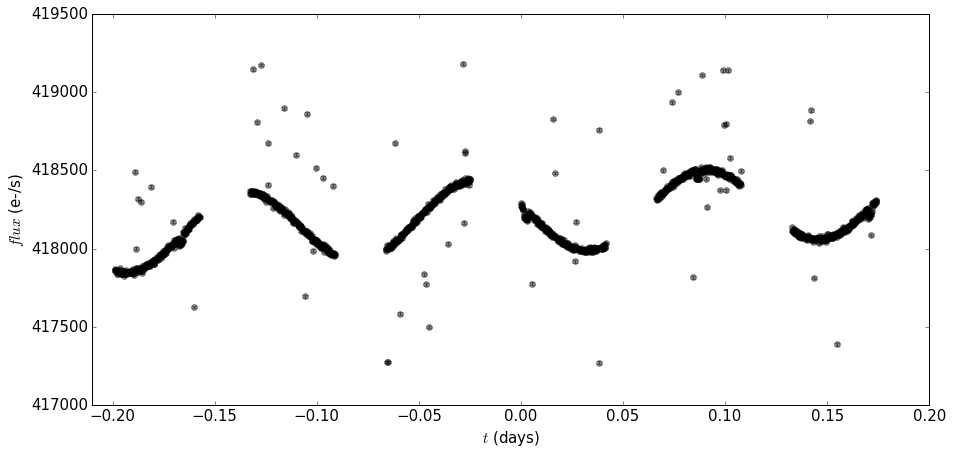

In [24]:
plt.rcParams['figure.facecolor'] = 'white'

#Plot data:
plt.figure(figsize=(15,7))

plt.errorbar(t,flux,yerr=error_flux,fmt='o',color='k',alpha=0.5)
plt.xlabel('$t$ (days)',size=15)
plt.ylabel('$flux$ (e-/s)',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.xlim(-0.21,0.2)


# Define Models

In [25]:
# Moving Median Function: 
def m_m(x,window):
    #Define Lists  
    R=[]
    DP=window-1 # DP is accounted for the length of even and unven numbers. 
    for i in range( len(flux)-DP ):
        MM = x[i:(i+window)] #Jumping indicies -- that allow the moving median
        MED = np.median(np.sort(MM)) #We sort the window and take the median. 
        R.append(MED) #Append list (R)
        
    return R 

#Identifying accepted points (raw data) and finding outliers.
def get_out(flux,t,window):
    #Define Lits: 
    D1, D2, D3, D4 = [], [], [], []
    
    for i in range( len(flux)):
        MM = flux[i:(i+window)] #Jumping indicies -- that allow the moving median
        MED = np.median(np.sort(MM)) #Find moving Median of window 
        
        #Decide if data to be accepted or rejected.   
        if np.absolute(flux[i] - MED) > (4.5*8.864388):  #where 8.864 is the error for all data points.
            D1.append(flux[i]) #rejected...
            D2.append(t[i])
        else: 
            D3.append(flux[i]) #accepted...
            D4.append(t[i])

    return D1,D2,D3,D4

    

In [26]:
#Run Get_out Function to accept & reject points

m1=get_out(flux,t,5) #Window of 5 works okay!

#Accepted Data: (...meaning that outliers have been removed)
a_f=m1[2] #accepted flux
a_t=m1[3] #accepted time

# Plot Accepted,Rejected & Moving Median Points

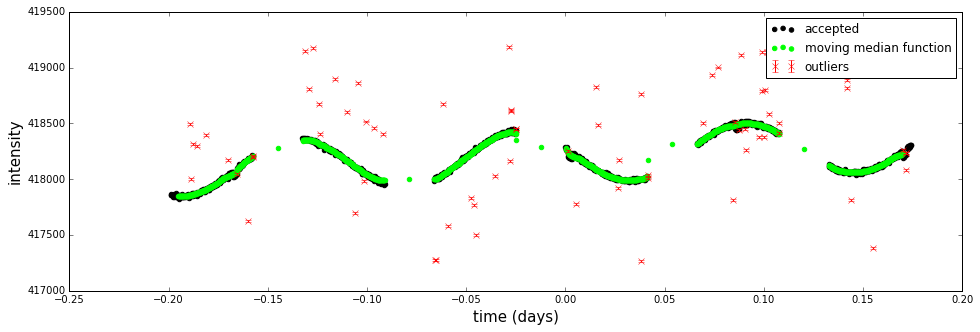

In [27]:
plt.figure(figsize=(16,5))

plt.scatter(a_t,a_f,color='black',label='accepted')
plt.legend()

plt.errorbar(m1[1],m1[0],yerr=error_flux[0:len(m1[1])],fmt='x',color='red',label='outliers')

plt.scatter(m_m(t,50),m_m(flux,50),label='moving median function',color='lime')
plt.legend()

plt.xlabel('time (days)',size=15)
plt.ylabel('intensity',size=15)




# De-Trending Data: Non-Parametrically using other methods

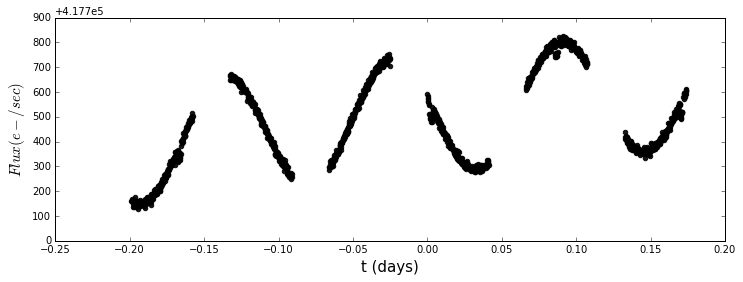

In [28]:
# Here we just want to briefely show that from the get_out funtion we've not cut off too many points from tha transits
# And that we can see the transits nice and clear! 

#accepted data points
plt.figure(figsize=(12,4))
plt.scatter(a_t,a_f,color='k',alpha=0.9)

plt.xlabel('t (days)',size=15)
plt.ylabel('$Flux (e-/sec)$',size=15)

In [29]:
# For convinience we now define a new moving median function -- in reality it's the same exact one as the previous funcitons.
def m_m_new(x,window):
    #Define Lists  
    R=[]
    DP=window
    for i in range( len(x)-DP ):
        MM = x[i:(i+window)] #Jumping indicies
        MED = np.median(np.sort(MM)) #We sort the window and take the median. 
        R.append(MED) #Append list (R)
        
    return R 



# Divide Lightcurve

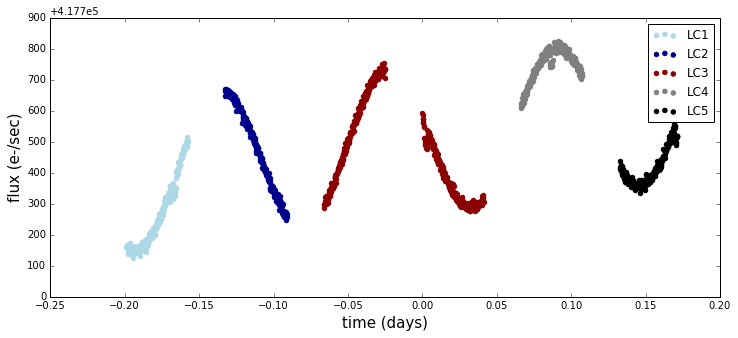

In [30]:
#Although there might be a quicker way of doing this, I attempt to divide all of the data from t1,t2...t6 & same for flux
# This will be particularly be useful make individual measurements for each transit. 

#Light Curve 1: 
t1 = a_t[0:258] #where at is the accepted times -- 
f1 = a_f[0:258]
#Light Curve 2: 
t2 = a_t[258:513]
f2 = a_f[258:513]
#Light Curve 3: 
t3 = a_t[513:1018] #765
f3 = a_f[513:1018]
#Light Curve 4: 

#Light Curve 5: 
t5 = a_t[1018:1270]
f5 = a_f[1018:1270]
#Light Curve 6: 
t6 = a_t[1270::]
f6 = a_f[1270::]

# We plot just to verify that data is convinently divided in to sections. 
plt.figure(figsize=(12,5))
# ** LC: Light Curve
plt.scatter(t1,f1,color='lightblue',label='LC1')
plt.scatter(t2,f2,color='darkblue',label='LC2')
plt.scatter(t3,f3,color='darkred',label='LC3')

plt.scatter(t5,f5,color='gray',label='LC4')
plt.scatter(t6,f6,color='k',label='LC5')

plt.legend()
plt.xlabel('time (days)',size=15)
plt.ylabel('flux (e-/sec)',size=15)



# Detrending Single Light Curve

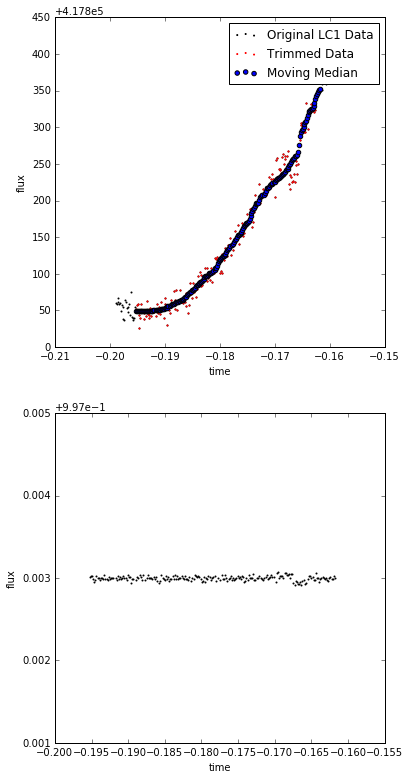

In [53]:

Div_t1 = [x/y for x,y in zip(t1[24:-26], m_m_new(t1,50))]
Div_f1 = [x/y for x,y in zip(f1[24:-26], m_m_new(f1,50))]

plt.figure(figsize=(13,13))

plt.subplot(221)
plt.scatter(t1,f1,s=1,color='k',label='Original LC1 Data') #accepted time,accepted flux of LC1

plt.scatter(t1[24:-26],f1[24:-26],s=1,color='red',label='Trimmed Data') #Trimmed by a certain ammount [24:-26]

plt.scatter(m_m_new(t1,50),m_m_new(f1,50),label='Moving Median') #The trimmed ammount depends on the window size we select for (m_m_new)

plt.xlabel('time')
plt.ylabel('flux')
plt.legend()


plt.subplot(223)
plt.scatter(t1[24:-26],Div_f1,s=1)


plt.xlabel('time')
plt.ylabel('flux')



# Detrend All Light Curves

In [54]:
Div_t1 = [x/y for x,y in zip(t1[24:-26], m_m_new(t1,50))]
Div_f1 = [x/y for x,y in zip(f1[24:-26], m_m_new(f1,50))]

Div_t2 = [x/y for x,y in zip(t2[24:-26], m_m_new(t2,50))]
Div_f2 = [x/y for x,y in zip(f2[24:-26], m_m_new(f2,50))]

Div_t3 = [x/y for x,y in zip(t3[24:-26], m_m_new(t3,50))]
Div_f3 = [x/y for x,y in zip(f3[24:-26], m_m_new(f3,50))]


Div_t5 = [x/y for x,y in zip(t5[24:-26], m_m_new(t5,50))]
Div_f5 = [x/y for x,y in zip(f5[24:-26], m_m_new(f5,50))]

Div_t6 = [x/y for x,y in zip(t6[24:-26], m_m_new(t6,50))]
Div_f6 = [x/y for x,y in zip(f6[24:-26], m_m_new(f6,50))]


# Isolated Sub-Plots of LC's

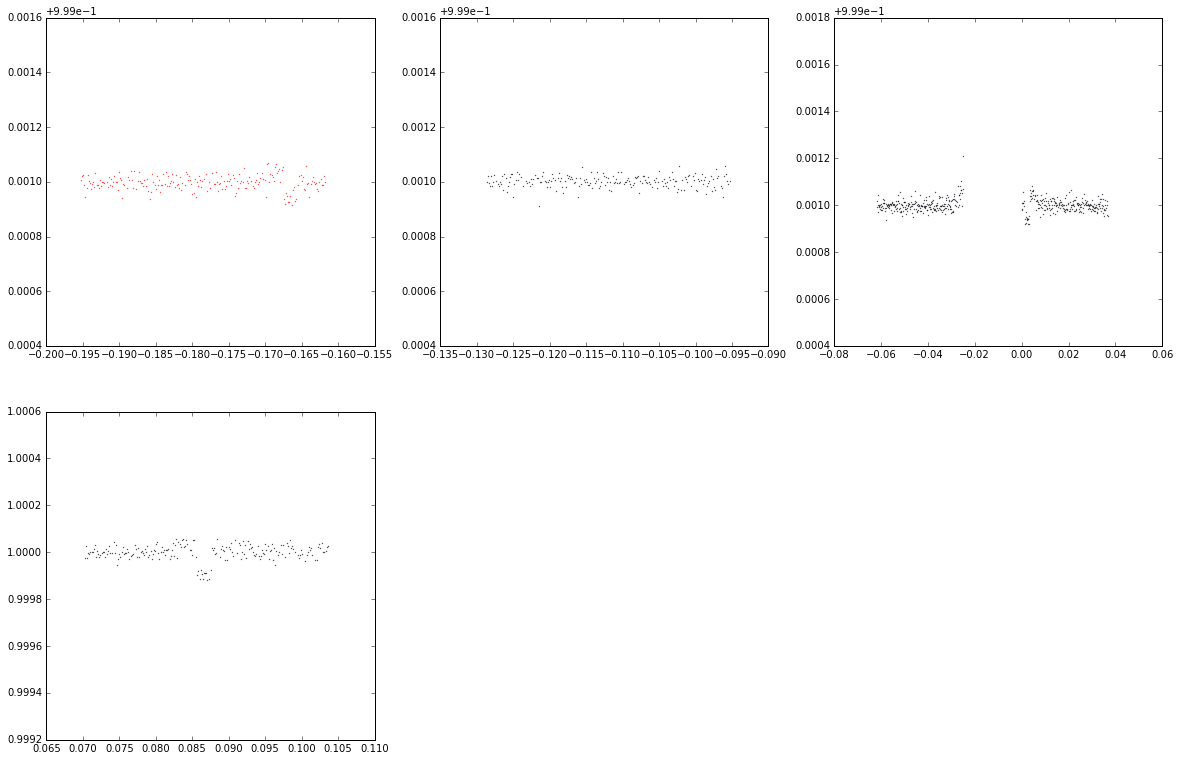

In [55]:
plt.figure(figsize=(20,20))

plt.subplot(331)
plt.scatter(t1[24:-26],Div_f1,color='red',s=.1)
plt.subplot(332)
plt.scatter(t2[24:-26],Div_f2,s=.1)
plt.subplot(333)
plt.scatter(t3[24:-26],Div_f3,s=.1)
 #BEST TRANSIT!
plt.subplot(334)
plt.scatter(t5[24:-26],Div_f5,s=.1)


# Stack LC's with Transits

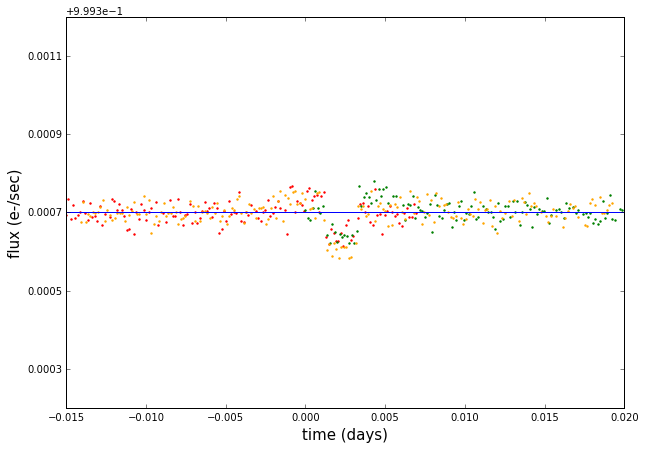

In [74]:
Period = 0.0843761046312123 #days 

plt.figure(figsize=(10,7))

plt.scatter([x + 2*Period for x in t1[24:-26]],Div_f1,color='red',s=2)

plt.scatter(t3[24:-26],Div_f3,s=2,color='green')

plt.scatter([x-Period for x in t5[24:-26]],Div_f5,s=2,color='orange')

plt.ylim(1-0.0005,1+0.0005)
plt.xlim(-0.015,0.02)
plt.axhline(1)
plt.xlabel('time (days)',size=15)
plt.ylabel('flux (e-/sec)',size=15)




# Normalized Transit Depth

In [57]:
# we will stitch data together
F_total = Div_f1 + Div_f3 + Div_f5 
T_total = [x + 2*Period for x in t1[24:-26]] + t3[24:-26] + [x-Period for x in t5[24:-26]]

F_total = np.array(F_total)
T_total=np.array(T_total)


#Boundary
B = np.where((T_total>0.001)&(T_total<0.0035))
Depth = 1-np.mean(F_total[B])
Error_depth = np.std(F_total[B])


print "Depth: %s +/- %s" %(Depth,Error_depth)



Depth: 5.34001814053e-05 +/- 4.39802909532e-05


# RMS

(0, 200)

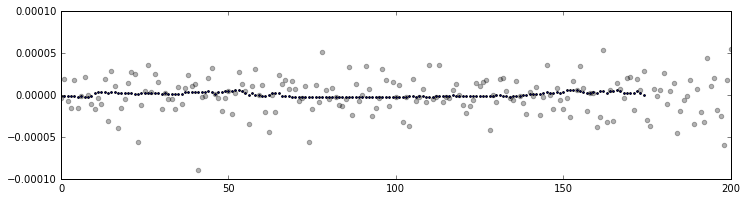

In [59]:
plt.figure(figsize=(12,3))
Div_f2 = np.array(Div_f2)

Res = Div_f2 - np.mean(Div_f2)
plt.scatter(range(len(Res)),Res,color='k',alpha=0.3)
plt.scatter(range(len(m_m_new(Res,30))),m_m_new(Res,30),s=3)
plt.ylim(-0.0001,0.0001)
plt.xlim(0,200)

# Residuals

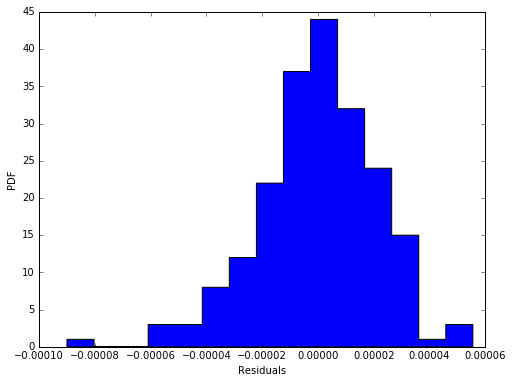

In [42]:
plt.figure(figsize=(8,6))
plt.hist(Res,bins=15,histtype='stepfilled')
plt.xlabel('Residuals',size=15)
plt.ylabel('PDF',size=15)